In [3]:
pip install pydotplus

     ------------------------------------ 278.7/278.7 KB 504.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for pydotplus, since package 'wheel' is not installed.
  Running setup.py install for pydotplus: started
  Running setup.py install for pydotplus: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install graphviz

     -------------------------------------- 46.3/46.3 KB 288.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd # For loading csv file data to numpy array
import pydotplus # To create Decision tree graph
from sklearn import tree # For Decision tree
from IPython.display import Image # To display image of the graph
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from datetime import datetime # To show current data and time
print('-------------------------Implement Classification Algorithm using Decision Tree-------------------------')
print('Name: Teli Farhana Khatoon')
print('Roll No.21')
print('College name: Vivek College of Commerce')
print('M.sc(I.T.)[Sem 2]')
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("Date and Time =", dt_string)	
#To import dataset
data=pd.read_csv('golf-dataset.csv')
data.head() #To show data

-------------------------Implement Classification Algorithm using Decision Tree-------------------------
Name: Teli Farhana Khatoon
Roll No.21
College name: Vivek College of Commerce
M.sc(I.T.)[Sem 2]
Date and Time = 14/04/2022 12:12:13


,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


-----------------------Dummy/Indicator variables-----------------------
    Windy  Outlook_Overcast  Outlook_Rainy  Outlook_Sunny  Temp_Cool  \
0   False                 0              1              0          0   
1    True                 0              1              0          0   
2   False                 1              0              0          0   
3   False                 0              0              1          0   
4   False                 0              0              1          1   
5    True                 0              0              1          1   
6    True                 1              0              0          1   
7   False                 0              1              0          0   
8   False                 0              1              0          1   
9   False                 0              0              1          0   
10   True                 0              1              0          0   
11   True                 1              0              0       

[Text(0.4, 0.875, 'X[7] <= 0.5\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.625, 'X[0] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.4, 0.375, 'X[2] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]')]

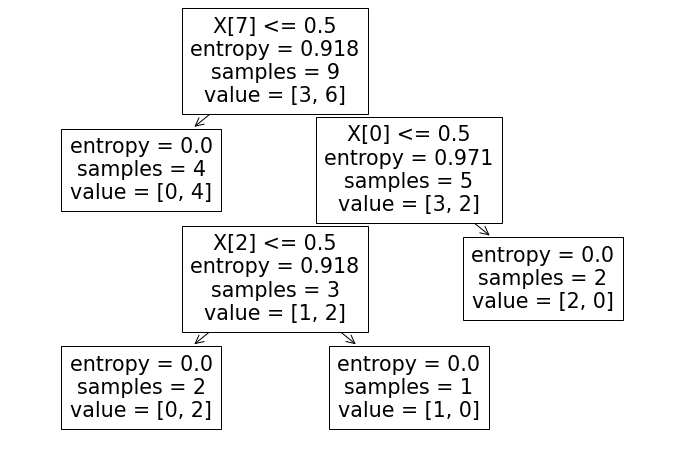

In [9]:
# Converting categorical variable into dummy/indicator variable
one_hot_data=pd.get_dummies(data[['Outlook', 'Temp', 'Humidity', 'Windy']]) #Feature Selection
# Print the new dummy data
print('-----------------------Dummy/Indicator variables-----------------------')
print(one_hot_data)
# The Decision tree classifier
cls=tree.DecisionTreeClassifier()
# Training the Decision tree
cls_train=cls.fit(one_hot_data, data['Play Golf'])
# Split data into train and test sets
x=one_hot_data
y=data['Play Golf']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
# Fitting the Model, Evaluating Result, and Visualizing Trees
# Get the accuracy score of the model
cls_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
cls_en.fit(x_train, y_train)
y_pred_en = cls_en.predict(x_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = cls_en.predict(x_train)
print('Train prediction entropy:-')
print(y_pred_train_en)
plt.figure(figsize=(12,8)) # Visualization
from sklearn import tree
tree.plot_tree(cls_en.fit(x_train, y_train))

Confusion matrix

 [[1 1]
 [1 2]]
--------------Decision Tree--------------
digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[1] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="X[8] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 2 ;
3 [label="X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
2 -> 6 ;
7 [label="X[0] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
7 -> 8 ;
9 [label="X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
9 -> 10 ;
11 [label="gini

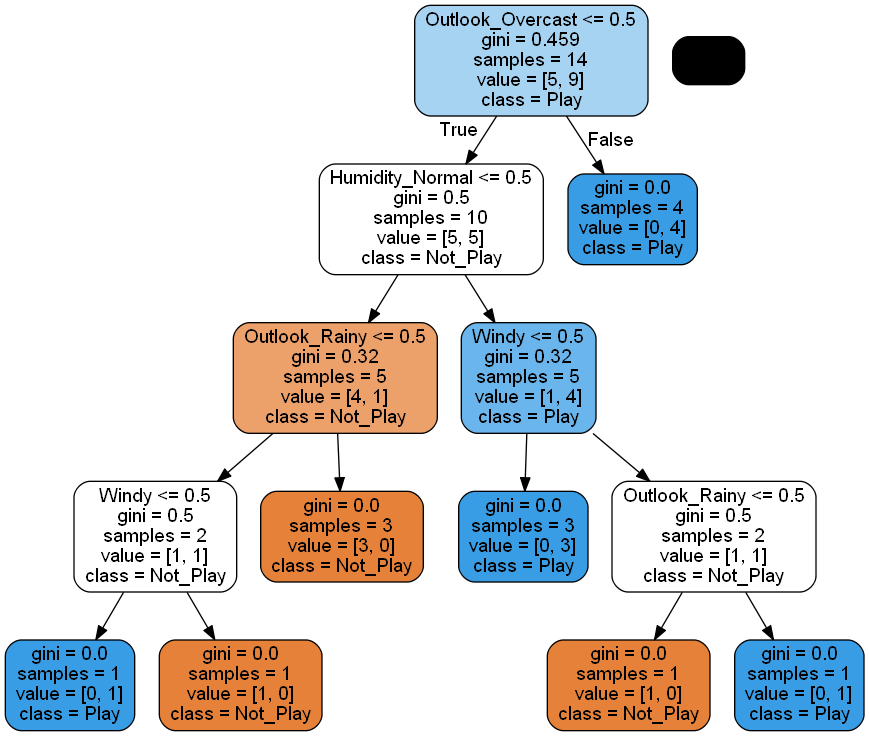

In [7]:
# Summarizing the performance of the model using confusion matrix
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)
print('--------------Decision Tree--------------')
# Export/Print a decision tree in Dot format
print(tree.export_graphviz(cls_train, None))
# Create Dot data
# Gini decides which attribute/feature should be placed at the root node,
# which features will act as internal nodes or leaf nodes.
dot_data =tree.export_graphviz(cls_train, out_file=None, filled=True, rounded=True, feature_names=list(one_hot_data.columns.values), class_names=['Not_Play', 'Play'])
# Create graph from Dot data
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Play_Golf.png') #Create ".png" file to save image
# Show graph
display(Image(graph.create_png()))

In [1]:
pip install python-graphviz

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


Dataset Source:-
https://gist.github.com/kudaliar032/b8cf65d84b73903257ed603f6c1a2508    

Link:- 
https://randerson112358.medium.com/python-decision-tree-classifier-example-d73bc3aeca6

https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f

https://www.xoriant.com/blog/product-engineering/decision-trees-machine-learning-algorithm.html